In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential, datasets

In [2]:
cifar10 = datasets.cifar10.load_data()

In [11]:
(xtrain, ytrain), (xtest, ytest) = cifar10

In [12]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
# scale the input images

xtrain, xtest = xtrain/ 255., xtest/ 255.

In [14]:
xtest.shape[0]

10000

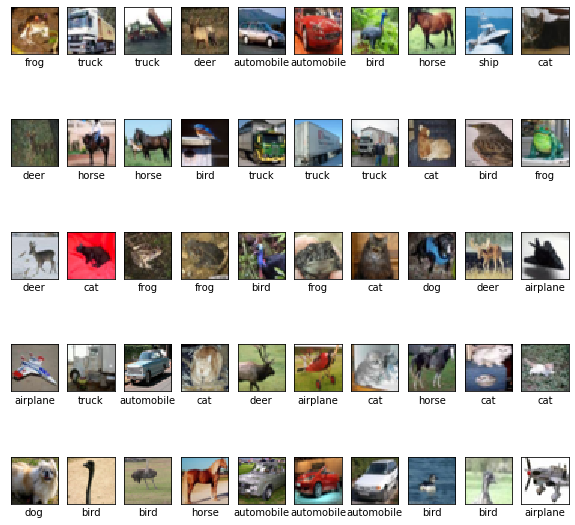

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap = plt.cm.binary)
    plt.xlabel(labels[ytrain[i][0]])
    
plt.show()

In [28]:
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import keras

In [18]:
num_classes = 10
ytrain = np_utils.to_categorical(ytrain,num_classes)
ytest = np_utils.to_categorical(ytest,num_classes)

num_validation = 0.1 * xtrain.shape[0]
num_validation = tf.cast(num_validation, tf.int64)
num_validation

xvalidation = xtrain[:num_validation,:,:,:]
xtrain = xtrain[num_validation:,:,:,:]

yvalidation = ytrain[:num_validation,:]
ytrain = ytrain[num_validation:,:]

print(xvalidation.shape)
print(yvalidation.shape)
print(xtrain.shape)
print(ytrain.shape)

train_ds = tf.data.Dataset.from_tensor_slices((xtrain, ytrain)).shuffle(1000).batch(100)

validation_ds = tf.data.Dataset.from_tensor_slices((xvalidation, yvalidation)).shuffle(1000).batch(num_validation)

test_ds = tf.data.Dataset.from_tensor_slices((xtest, ytest)).shuffle(1000).batch(xtest.shape[0])


print(train_ds)
print(validation_ds)
print(test_ds)

In [22]:
weight_decay = 1e-4

In [33]:
model = Sequential([
    
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [24]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(xtrain)

In [29]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
max_epochs = 125
batch_size = 64
model.fit(datagen.flow(xtrain, ytrain, batch_size=batch_size), validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0] // batch_size, epochs = max_epochs)

  ...
    to  
  ['...']
Train for 781 steps, validate on 10000 samples
Epoch 1/125
781/781 [==============================] - 629s 806ms/step - loss: 1.5393 - accuracy: 0.4549 - val_loss: 1.3390 - val_accuracy: 0.5595
Epoch 2/125
781/781 [==============================] - 546s 699ms/step - loss: 1.1660 - accuracy: 0.5989 - val_loss: 1.0178 - val_accuracy: 0.6563
Epoch 3/125
781/781 [==============================] - 545s 698ms/step - loss: 1.0137 - accuracy: 0.6597 - val_loss: 0.8933 - val_accuracy: 0.7127
Epoch 4/125
781/781 [==============================] - 542s 694ms/step - loss: 0.9218 - accuracy: 0.7020 - val_loss: 0.8918 - val_accuracy: 0.7109
Epoch 5/125
781/781 [==============================] - 541s 693ms/step - loss: 0.8639 - accuracy: 0.7237 - val_loss: 0.9337 - val_accuracy: 0.7020
Epoch 6/125
781/781 [==============================] - 540s 691ms/step - loss: 0.8284 - accuracy: 0.7407 - val_loss: 0.8487 - val_accuracy: 0.7437
Epoch 7/125
781/781 [=========================

781/781 [==============================] - 536s 687ms/step - loss: 0.5653 - accuracy: 0.8616 - val_loss: 0.5717 - val_accuracy: 0.8689
Epoch 56/125
781/781 [==============================] - 535s 684ms/step - loss: 0.5635 - accuracy: 0.8628 - val_loss: 0.6919 - val_accuracy: 0.8385
Epoch 57/125
781/781 [==============================] - 544s 696ms/step - loss: 0.5632 - accuracy: 0.8622 - val_loss: 0.5466 - val_accuracy: 0.8753
Epoch 58/125
781/781 [==============================] - 545s 698ms/step - loss: 0.5587 - accuracy: 0.8621 - val_loss: 0.6183 - val_accuracy: 0.8522
Epoch 59/125
781/781 [==============================] - 536s 686ms/step - loss: 0.5654 - accuracy: 0.8616 - val_loss: 0.6213 - val_accuracy: 0.8540
Epoch 60/125
781/781 [==============================] - 533s 683ms/step - loss: 0.5624 - accuracy: 0.8619 - val_loss: 0.6163 - val_accuracy: 0.8556
Epoch 61/125
781/781 [==============================] - 531s 680ms/step - loss: 0.5597 - accuracy: 0.8618 - val_loss: 0.5808 

781/781 [==============================] - 540s 691ms/step - loss: 0.5086 - accuracy: 0.8788 - val_loss: 0.5980 - val_accuracy: 0.8631
Epoch 111/125
781/781 [==============================] - 556s 712ms/step - loss: 0.5063 - accuracy: 0.8793 - val_loss: 0.5798 - val_accuracy: 0.8670
Epoch 112/125
781/781 [==============================] - 605s 775ms/step - loss: 0.5068 - accuracy: 0.8803 - val_loss: 0.5470 - val_accuracy: 0.8738
Epoch 113/125
781/781 [==============================] - 557s 713ms/step - loss: 0.5068 - accuracy: 0.8790 - val_loss: 0.6404 - val_accuracy: 0.8547
Epoch 114/125
781/781 [==============================] - 542s 694ms/step - loss: 0.5058 - accuracy: 0.8811 - val_loss: 0.6271 - val_accuracy: 0.8519
Epoch 115/125
781/781 [==============================] - 622s 796ms/step - loss: 0.5065 - accuracy: 0.8821 - val_loss: 0.5996 - val_accuracy: 0.8611
Epoch 116/125
781/781 [==============================] - 612s 783ms/step - loss: 0.5017 - accuracy: 0.8824 - val_loss: 0

In [36]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)

10000/10000 [==============================] - 19s 2ms/sample - loss: 0.6033 - accuracy: 0.8568


In [37]:
print('Loss: {0:.2f} Accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))

Loss: 0.60 Accuracy: 85.68%


In [39]:
model.save("Models/cifar_deep_cnn_1.h5")

In [52]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('Models/cifar_deep_cnn_1.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0, 20):
    rand = np.random.randint(0,len(xtest))
    input_im = xtest[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
           
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()